# Task 1

In [154]:
#Loading libraries
from keras.datasets import cifar10
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Dropout, SpatialDropout2D, BatchNormalization, Flatten, Activation
from keras.layers import Conv2D, MaxPooling2D, Conv1D
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from keras.utils.np_utils import to_categorical
from keras.optimizers import Adam, SGD

In [140]:
# Loading the data set
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Train split to validation
x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train, test_size = 0.2)
# Normalizing the data
x_train = x_train.astype('float32') / 255 
x_valid = x_valid.astype('float32') / 255
x_test = x_test.astype('float32') / 255

# One - Hot - Key Coding
N = 10
y_train = to_categorical(y_train, N)
y_valid = to_categorical(y_valid, N)
y_test = to_categorical(y_test, N)

In [141]:
# Defining Nureal Network Model
def Model():
    model = Sequential()  
    model.add(Conv2D(64, kernel_size=(5,5), strides = 1, padding='same', input_shape=(32, 32, 3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2), strides = 2))

    model.add(Conv2D(192, kernel_size=(5,5), strides = 1, padding='same'))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2), strides = 2))

    model.add(Conv2D(384, kernel_size=(3,3), strides = 1, padding='same'))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2), strides = 2))

    model.add(Conv2D(256, kernel_size=(5,5), strides = 1, padding='same'))
    model.add(MaxPooling2D(pool_size=(2, 2), strides = 2))
    model.add(Activation('relu'))
        
    model.add(Conv2D(256, kernel_size=(5,5), strides = 1, padding='same'))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2), strides = 2))

    model.add(Flatten())
    
    model.add(Dense(4096))
    model.add(Activation('relu'))
              
    model.add(Dense(4096))
    model.add(Activation('relu'))         
    
    model.add(Dense(10))
    model.add(Activation('softmax'))
    return model

In [156]:
# Model Instances 
sgd = SGD(learning_rate=0.001, momentum=0.0, nesterov=False, name="SGD")
model = []
for i in range(3):
  model.append(Model())
  model[i].compile(loss='categorical_crossentropy', optimizer = sgd, metrics=['accuracy'])

In [157]:
# Training of Model
batch_sizes = [16, 32, 64]
batch_dic = {}
score_dic = {}

for idx, val in enumerate(batch_sizes):
  batch_dic[val] = model[idx].fit(x_train, y_train, batch_size = val, epochs=60, validation_data=(x_valid, y_valid))
  score_dic[val] = model[idx].evaluate(x_test, y_test, verbose=0)

Epoch 1/60
2500/2500 [==============================] - 18s 6ms/step - loss: 2.3022 - accuracy: 0.1176 - val_loss: 2.3013 - val_accuracy: 0.1452
Epoch 2/60
2500/2500 [==============================] - 15s 6ms/step - loss: 2.3009 - accuracy: 0.1578 - val_loss: 2.2997 - val_accuracy: 0.2059
Epoch 3/60
2500/2500 [==============================] - 15s 6ms/step - loss: 2.2989 - accuracy: 0.1576 - val_loss: 2.2964 - val_accuracy: 0.1679
Epoch 4/60
2500/2500 [==============================] - 15s 6ms/step - loss: 2.2947 - accuracy: 0.1595 - val_loss: 2.2869 - val_accuracy: 0.1473
Epoch 5/60
2500/2500 [==============================] - 16s 6ms/step - loss: 2.2817 - accuracy: 0.1437 - val_loss: 2.2516 - val_accuracy: 0.1574
Epoch 6/60
2500/2500 [==============================] - 16s 6ms/step - loss: 2.2273 - accuracy: 0.1750 - val_loss: 2.1418 - val_accuracy: 0.2028
Epoch 7/60
2500/2500 [==============================] - 15s 6ms/step - loss: 2.1077 - accuracy: 0.2180 - val_loss: 2.0465 - val_ac

In [ ]:
!pip install xlsxwriter

     |████████████████████████████████| 149 kB 16.8 MB/s 


<Figure size 432x288 with 0 Axes>

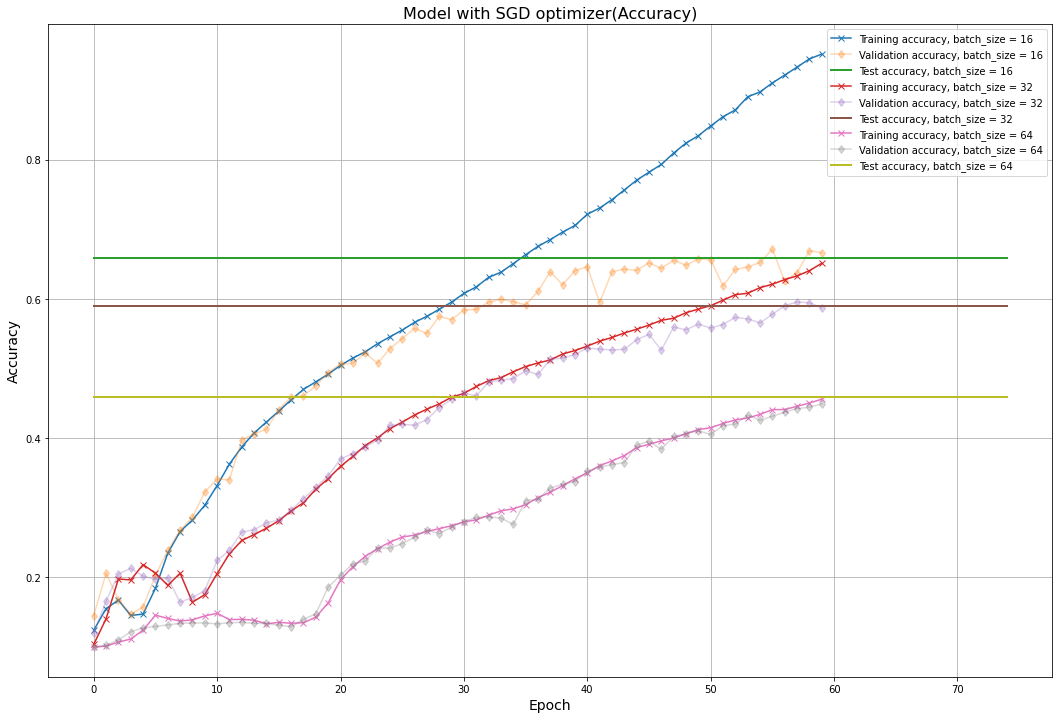

<Figure size 432x288 with 0 Axes>

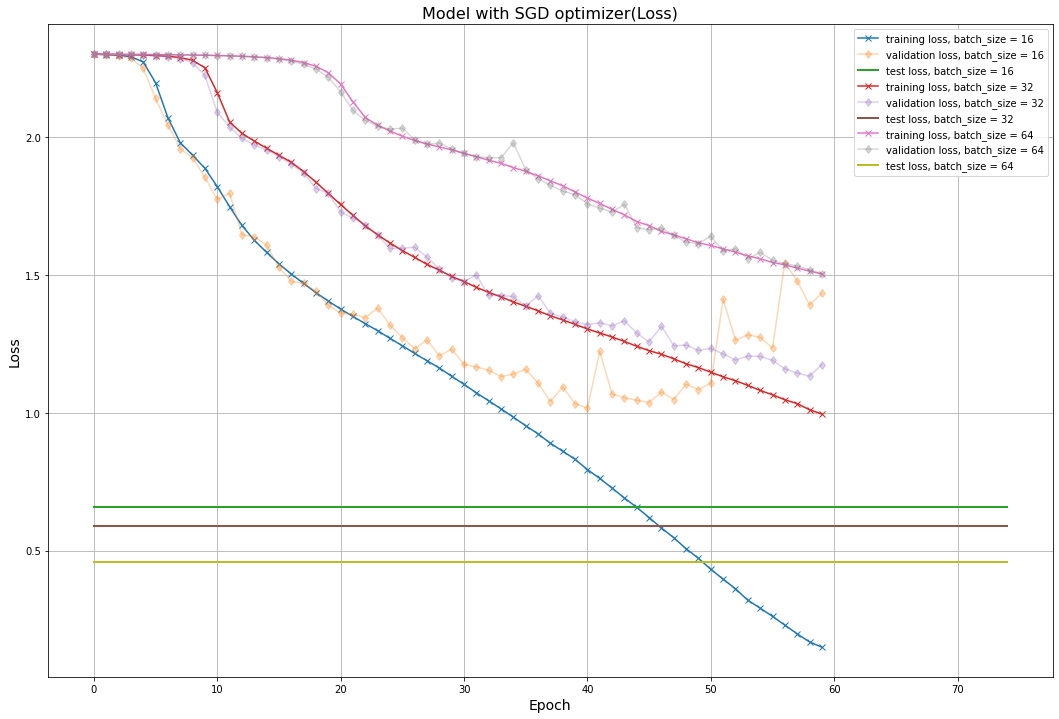

In [158]:
modelName = 'Model with SGD optimizer'

# plotting the model and saving it to excel
plt.figure(1)
plt.figure(figsize = (18, 12))
for idx, val in enumerate(batch_dic):
  plt.plot(batch_dic[val].history['accuracy'], marker = 'x', label='Training accuracy, batch_size = {batch}'.format(batch = val))
  plt.plot(batch_dic[val].history['val_accuracy'], marker = "d", alpha = 0.3, label='Validation accuracy, batch_size = {batch}'.format(batch = val))
  plt.plot(np.ones((75,1)) * score_dic[val][1], linewidth = 2, label = 'Test accuracy, batch_size = {batch}'.format(batch = val))

plt.title('{modelName}(Accuracy)'.format(modelName = modelName), fontsize = 16)
plt.grid()
plt.xlabel('Epoch', fontsize = 14)
plt.ylabel('Accuracy', fontsize = 14)
plt.legend(loc='best')
plt.savefig('{modelName}(Accuracy).png'.format(modelName = modelName), dpi=fig.dpi)
plt.show()


plt.figure(2)
plt.figure(figsize = (18, 12))
for idx, val in enumerate(batch_dic):
  plt.plot(batch_dic[val].history['loss'], marker='x', label='training loss, batch_size = {batch}'.format(batch = val))
  plt.plot(batch_dic[val].history['val_loss'], marker='d', alpha = 0.3, label='validation loss, batch_size = {batch}'.format(batch = val))
  plt.plot(np.ones((75,1)) * score_dic[val][1], linewidth = 2, label = 'test loss, batch_size = {batch}'.format(batch = val))

plt.title('{modelName}(Loss)'.format(modelName = modelName), fontsize = 16)
plt.grid()
plt.xlabel('Epoch', fontsize = 14)
plt.ylabel('Loss', fontsize = 14)
plt.legend(loc='best')
plt.savefig('{modelName}(Loss).png'.format(modelName = modelName), dpi=fig.dpi)
plt.show()


#-------------------------------------------Saving records-------------------------------------------
# Create a Pandas Excel writer using XlsxWriter as the engine.
writer = pd.ExcelWriter('{}.xlsx'.format(modelName), engine='xlsxwriter')

df = pd.DataFrame(batch_dic[16].history, columns = ['loss', 'accuracy', 'val_loss' , 'val_accuracy'])
df['Batch Size'] = 16

temp = pd.DataFrame(batch_dic[32].history, columns = ['loss', 'accuracy', 'val_loss' , 'val_accuracy'])
temp['Batch Size'] = 32
df = df.append(temp)

temp = pd.DataFrame(batch_dic[64].history, columns = ['loss', 'accuracy', 'val_loss' , 'val_accuracy'])
temp['Batch Size'] = 64
df = df.append(temp)
df.to_excel(writer, sheet_name = 'Records')
#--------------------------------------------Saving scores----------------------------------------------
df_score = pd.DataFrame(score_dic[16])
df_score = df_score.T
df['Batch Size'] = 16
temp = pd.DataFrame(score_dic[32])
temp = temp.T
temp['Batch Size'] = 32
df_score = df_score.append(temp)
temp = pd.DataFrame(score_dic[64])
temp = temp.T
temp['Batch Size'] = 64
df_score = df_score.append(temp)
df_score.rename(columns={0: "Loss", 1: "Accuracy"}, inplace=True)
df_score.to_excel(writer, sheet_name = 'Scores')


# Close the Pandas Excel writer and output the Excel file.
writer.save()
